# Question 1: Plot Daily Sales for All 50 Weeks

In [187]:
# Import dependencies
import os
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [188]:
# Get all file names in datasets directory
all_csv_files = [pd.read_csv(filename) for filename in glob.glob("./datasets/*.csv")]

In [189]:
# Display all csv files in datasets directory and verify 50 are present
print(len(all_csv_files))

50


In [190]:
# Create the complete dataset from files in datasets directory
df = pd.concat(all_csv_files, axis=0)
df.head()

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female


In [191]:
# Check datatypes from df
df.dtypes

sale_time           object
purchaser_gender    object
dtype: object

In [192]:
# Convert sale_time to datetime object
df['sale_time'] = pd.to_datetime(df['sale_time'])
sales_day = pd.to_datetime(df['sale_time'])

In [193]:
# Check datatypes from df
df.dtypes

sale_time           datetime64[ns]
purchaser_gender            object
dtype: object

In [194]:
# Calculate number of sales by gender per day
sum = df.groupby(df.sale_time.dt.day)['purchaser_gender'].value_counts()
print(sum)

sale_time  purchaser_gender
1          female              3757
           male                3199
2          female              3832
           male                3311
3          female              3727
                               ... 
29         male                2919
30         female              3136
           male                2919
31         female              2199
           male                2127
Name: purchaser_gender, Length: 62, dtype: int64


In [195]:
sales_day

0      2013-01-07 02:14:07
1      2013-01-07 02:57:53
2      2013-01-07 02:59:49
3      2013-01-07 03:02:53
4      2013-01-07 03:27:36
               ...        
4970   2013-08-18 23:05:04
4971   2013-08-18 23:07:48
4972   2013-08-18 23:10:08
4973   2013-08-18 23:25:14
4974   2013-08-18 23:30:16
Name: sale_time, Length: 204329, dtype: datetime64[ns]

In [196]:
# Calculate total number of sales by day
daily_sales_df = sales_day.groupby(sales_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df

,sale_time,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


In [197]:
# Set index to sales_day to make plotting easier
daily_sales_df.index = daily_sales_df['sale_time']
daily_sales_df.drop(columns=['sale_time'], inplace=True)
daily_sales_df 

,sales_amount
sale_time,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


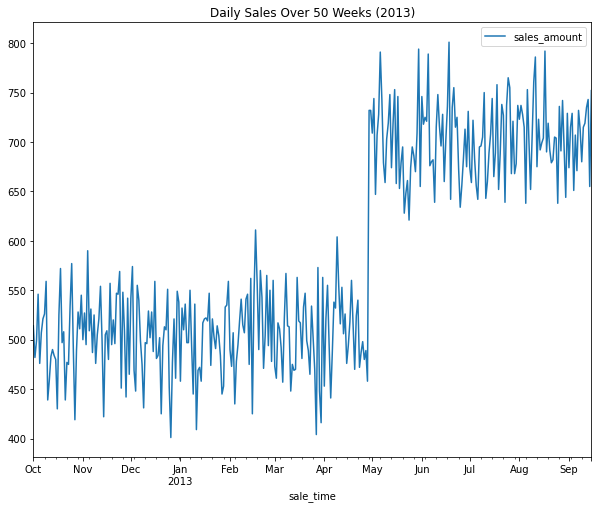

In [198]:
# Set constant figure size
figure_size = (10,8)
# Plot daily sales for all 50 weeks
daily_sales_df.plot(figsize=figure_size, title="Daily Sales Over 50 Weeks (2013)")
plt.show()

# Question 2: What Date Did the Change in Sales Occur?

In [199]:
# Create a column to hold sales amount from prior day
daily_sales_df['sales_amount_prev_day'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]

# Compare sales amount difference with sales from the previous day
daily_sales_df["difference_in_sales"] = daily_sales_df['sales_amount'] - daily_sales_df['sales_amount_prev_day']
daily_sales_df.head()

,sales_amount,sales_amount_prev_day,difference_in_sales
sale_time,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


In [200]:
# Return the index of the first occurence of  
sales_change = daily_sales_df['difference_in_sales'].idxmax()
print(sales_change)

2013-04-29 00:00:00


In [201]:
# Display the date and data from the day with the biggest change in sales
daily_sales_df[daily_sales_df.index == sales_change]

,sales_amount,sales_amount_prev_day,difference_in_sales
sale_time,,,
2013-04-29,732,458.0,274.0


# Question 3: Is the Drop in Sales Statistically Significantly Lower?

In [202]:
# Check for null values
daily_sales_df.isnull().sum()

sales_amount             0
sales_amount_prev_day    1
difference_in_sales      1
dtype: int64

In [203]:
# Compare maximum sales amount with sales_amount
stats.ttest_1samp(daily_sales_df['sales_amount'], 732, nan_policy='omit')

Ttest_1sampResult(statistic=-26.367553024439697, pvalue=4.5681432390066193e-85)

The p-value is 4.56*10^-85 indicating that the change in sales is highly statistically significant

# Question 4: Is the Drop in Sales Due to a Change in the Gender of the Customers?

In [204]:
# Change sale_time to datetime dtype
df['sale_time'] = pd.to_datetime(df['sale_time']).dt.floor('d')

# Create gender_df to explore distribution of purchases by gender each day
gender_df = df.groupby(['sale_time', 'purchaser_gender']).size().reset_index(name='sales_amount')

In [205]:
gender_df.head()

,sale_time,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386


In [206]:
# Create a new dataframe with only unique sales times
new_df = pd.DataFrame(gender_df['sale_time'].unique(), columns=['sale_time'])

# Calculate female and male sales amount separately
new_df['female_sales'] = pd.Series(gender_df[gender_df.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
new_df['male_sales'] = pd.Series(gender_df[gender_df.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)

new_df 

,sale_time,female_sales,male_sales
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


In [207]:
# Calculate the ratio of sales based on gender
new_df['gender_ratio'] =new_df['male_sales']/new_df['female_sales']
new_df

,sale_time,female_sales,male_sales,gender_ratio
0,2012-10-01,413,101,0.244552
1,2012-10-02,379,103,0.271768
2,2012-10-03,386,113,0.292746
3,2012-10-04,432,114,0.263889
4,2012-10-05,368,108,0.293478
...,...,...,...,...
345,2013-09-11,224,495,2.209821
346,2013-09-12,225,510,2.266667
347,2013-09-13,206,537,2.606796
348,2013-09-14,193,462,2.393782


In [208]:
# Prepare dataframe for plot
plot_df = new_df.copy()
plot_df['total_sales_amount'] = plot_df['female_sales'] + plot_df['male_sales']
plot_df.index = plot_df['sale_time']
plot_df.drop(columns=['gender_ratio', 'sale_time'], inplace=True)
plot_df

,female_sales,male_sales,total_sales_amount
sale_time,,,
2012-10-01,413,101,514
2012-10-02,379,103,482
2012-10-03,386,113,499
2012-10-04,432,114,546
2012-10-05,368,108,476
...,...,...,...
2013-09-11,224,495,719
2013-09-12,225,510,735
2013-09-13,206,537,743


<function matplotlib.pyplot.show(*args, **kw)>

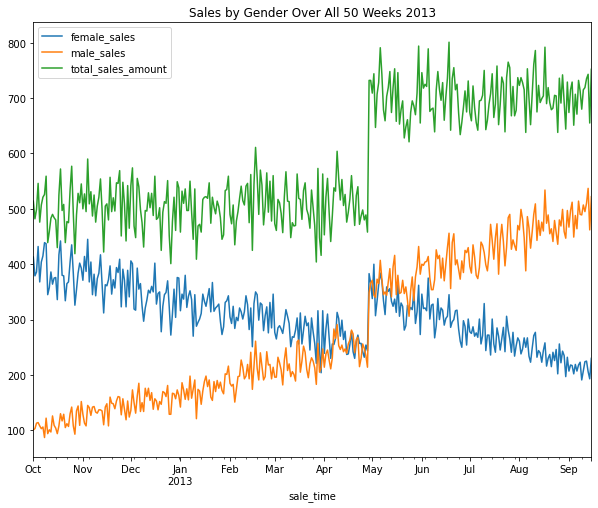

In [209]:
plot_df.plot(figsize=figure_size, title="Sales by Gender Over All 50 Weeks 2013")
plt.show

# Question 5: What is the Percentage of Sales in Each Part of the Day Over All 50 Weeks?